## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [11]:
df = pd.read_csv('data/human_body_temperature.csv')

In [19]:
tempdf=df.temperature

In [40]:
#question 1
stats.mstats.normaltest(tempdf)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [22]:
#pvalue>alpha=0.05 so we cannot reject hypothesis that the distribution of temperature is normal

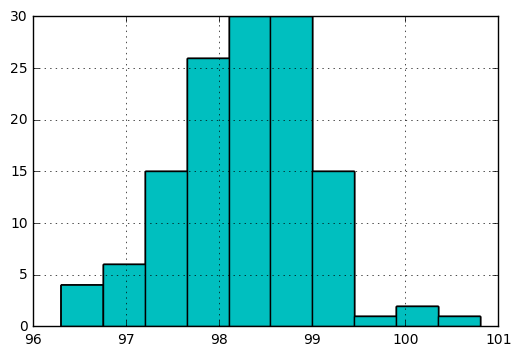

In [28]:
#the second way to look at is through histogram
plt.hist(tempdf)
plt.show()

In [64]:
#question 2
#Ho: the mean of body temperature is 98.6
#we do not know the true value of population (or at least we cannot assume it), we then use t-test
t_stats=stats.t.ppf(1-0.025, len(df)-1)
t_value= stats.ttest_1samp(tempdf, 98.6)
print ('t_statistic = ', t_stats)
print (t_value)
print('abs(t_value)>t_stats or pvalue<0.05, we reject the null hypothesis that the mean of body temperature is 98.6 at 5% significant level')

t_statistic =  1.97852449146
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
abs(t_value)>t_stats or pvalue<0.05, we reject the null hypothesis that the mean of body temperature is 98.6 at 5% significant level


In [60]:
#question 3
margin_of_error=t_stats*(tempdf.std()/math.sqrt(len(df)))
confidence_interval=(tempdf.mean()-margin_of_error,tempdf.mean()+margin_of_error)
print('the body temperature outside this interval will be considered abnormal')
confidence_interval

the body temperature outside this interval will be considered abnormal


(98.122002905608042, 98.376458632853513)

In [79]:
#question 4
temp_male=df[df.gender=='M'].temperature
temp_fe=df[df.gender=='F'].temperature

scipy.stats.ttest_ind_from_stats(temp_male.mean(), temp_male.std(),len(temp_male),temp_fe.mean(), temp_fe.std(),len(temp_fe), equal_var=False)

Ttest_indResult(statistic=-2.2854345381652741, pvalue=0.023938264182954513)

In [81]:
print('pvalue<0.05 so we reject the hypothesis that the temperatures for male and female are different at 95% confidence interval')

pvalue<0.05 so we reject the hypothesis that the temperatures for male and female are different at 95% confidence interval
